In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

In [2]:
# Load the data
cust_demographics = pd.read_excel('CustomerDemographics.xlsx')
cust_behavior = pd.read_excel('CustomerBehaviorData.xlsx')
credit_consumption = pd.read_excel('CreditConsumptionData.xlsx')

In [3]:
# Display information about customer demographics data
cust_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [4]:
# Drop rows with missing values in customer demographics data
cust_demographics = cust_demographics.dropna()

In [5]:
# Display information about customer behavior data
cust_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [6]:
# Clean data by dropping rows with missing values in customer behavior and credit consumption data
cust_behavior = cust_behavior.dropna()
credit_consumption = credit_consumption.dropna()

In [7]:
# Check for missing values in each DataFrame
print(cust_demographics.isna().sum())
print(cust_behavior.isna().sum())
print(credit_consumption.isna().sum())

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
dtype: int64
ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0

In [8]:
# Exploratory Data Analysis (EDA) on customer behavior data
cust_behavior.describe()
cust_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19993 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     19993 non-null  int64  
 1   cc_cons_apr            19993 non-null  float64
 2   dc_cons_apr            19993 non-null  float64
 3   cc_cons_may            19993 non-null  float64
 4   dc_cons_may            19993 non-null  float64
 5   cc_cons_jun            19993 non-null  float64
 6   dc_cons_jun            19993 non-null  float64
 7   cc_count_apr           19993 non-null  float64
 8   cc_count_may           19993 non-null  int64  
 9   cc_count_jun           19993 non-null  int64  
 10  dc_count_apr           19993 non-null  int64  
 11  dc_count_may           19993 non-null  int64  
 12  dc_count_jun           19993 non-null  int64  
 13  card_lim               19993 non-null  int64  
 14  personal_loan_active   19993 non-null  int64  
 15  vehicle

In [9]:
# Display information about customer demographics data
cust_demographics.info()
print(cust_demographics.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 19993 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            19993 non-null  int64  
 1   account_type                  19993 non-null  object 
 2   gender                        19993 non-null  object 
 3   age                           19993 non-null  int64  
 4   Income                        19993 non-null  object 
 5   Emp_Tenure_Years              19993 non-null  float64
 6   Tenure_with_Bank              19993 non-null  int64  
 7   region_code                   19993 non-null  float64
 8   NetBanking_Flag               19993 non-null  int64  
 9   Avg_days_between_transaction  19993 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.7+ MB
                 ID           age  Emp_Tenure_Years  Tenure_with_Bank  \
count  19993.000000  19993.000000      19993.000000  

In [10]:
# Display information about credit consumption data
print(credit_consumption.info())
print(credit_consumption.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       15000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 351.6 KB
None
                 ID        cc_cons
count  15000.000000   15000.000000
mean   10032.077067   55157.729867
std     5760.372343   97670.972252
min        1.000000       0.000000
25%     5060.500000    6768.000000
50%    10054.000000   13364.000000
75%    15015.250000   20105.750000
max    19998.000000  408382.000000


In [11]:
# Data Visualization using Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

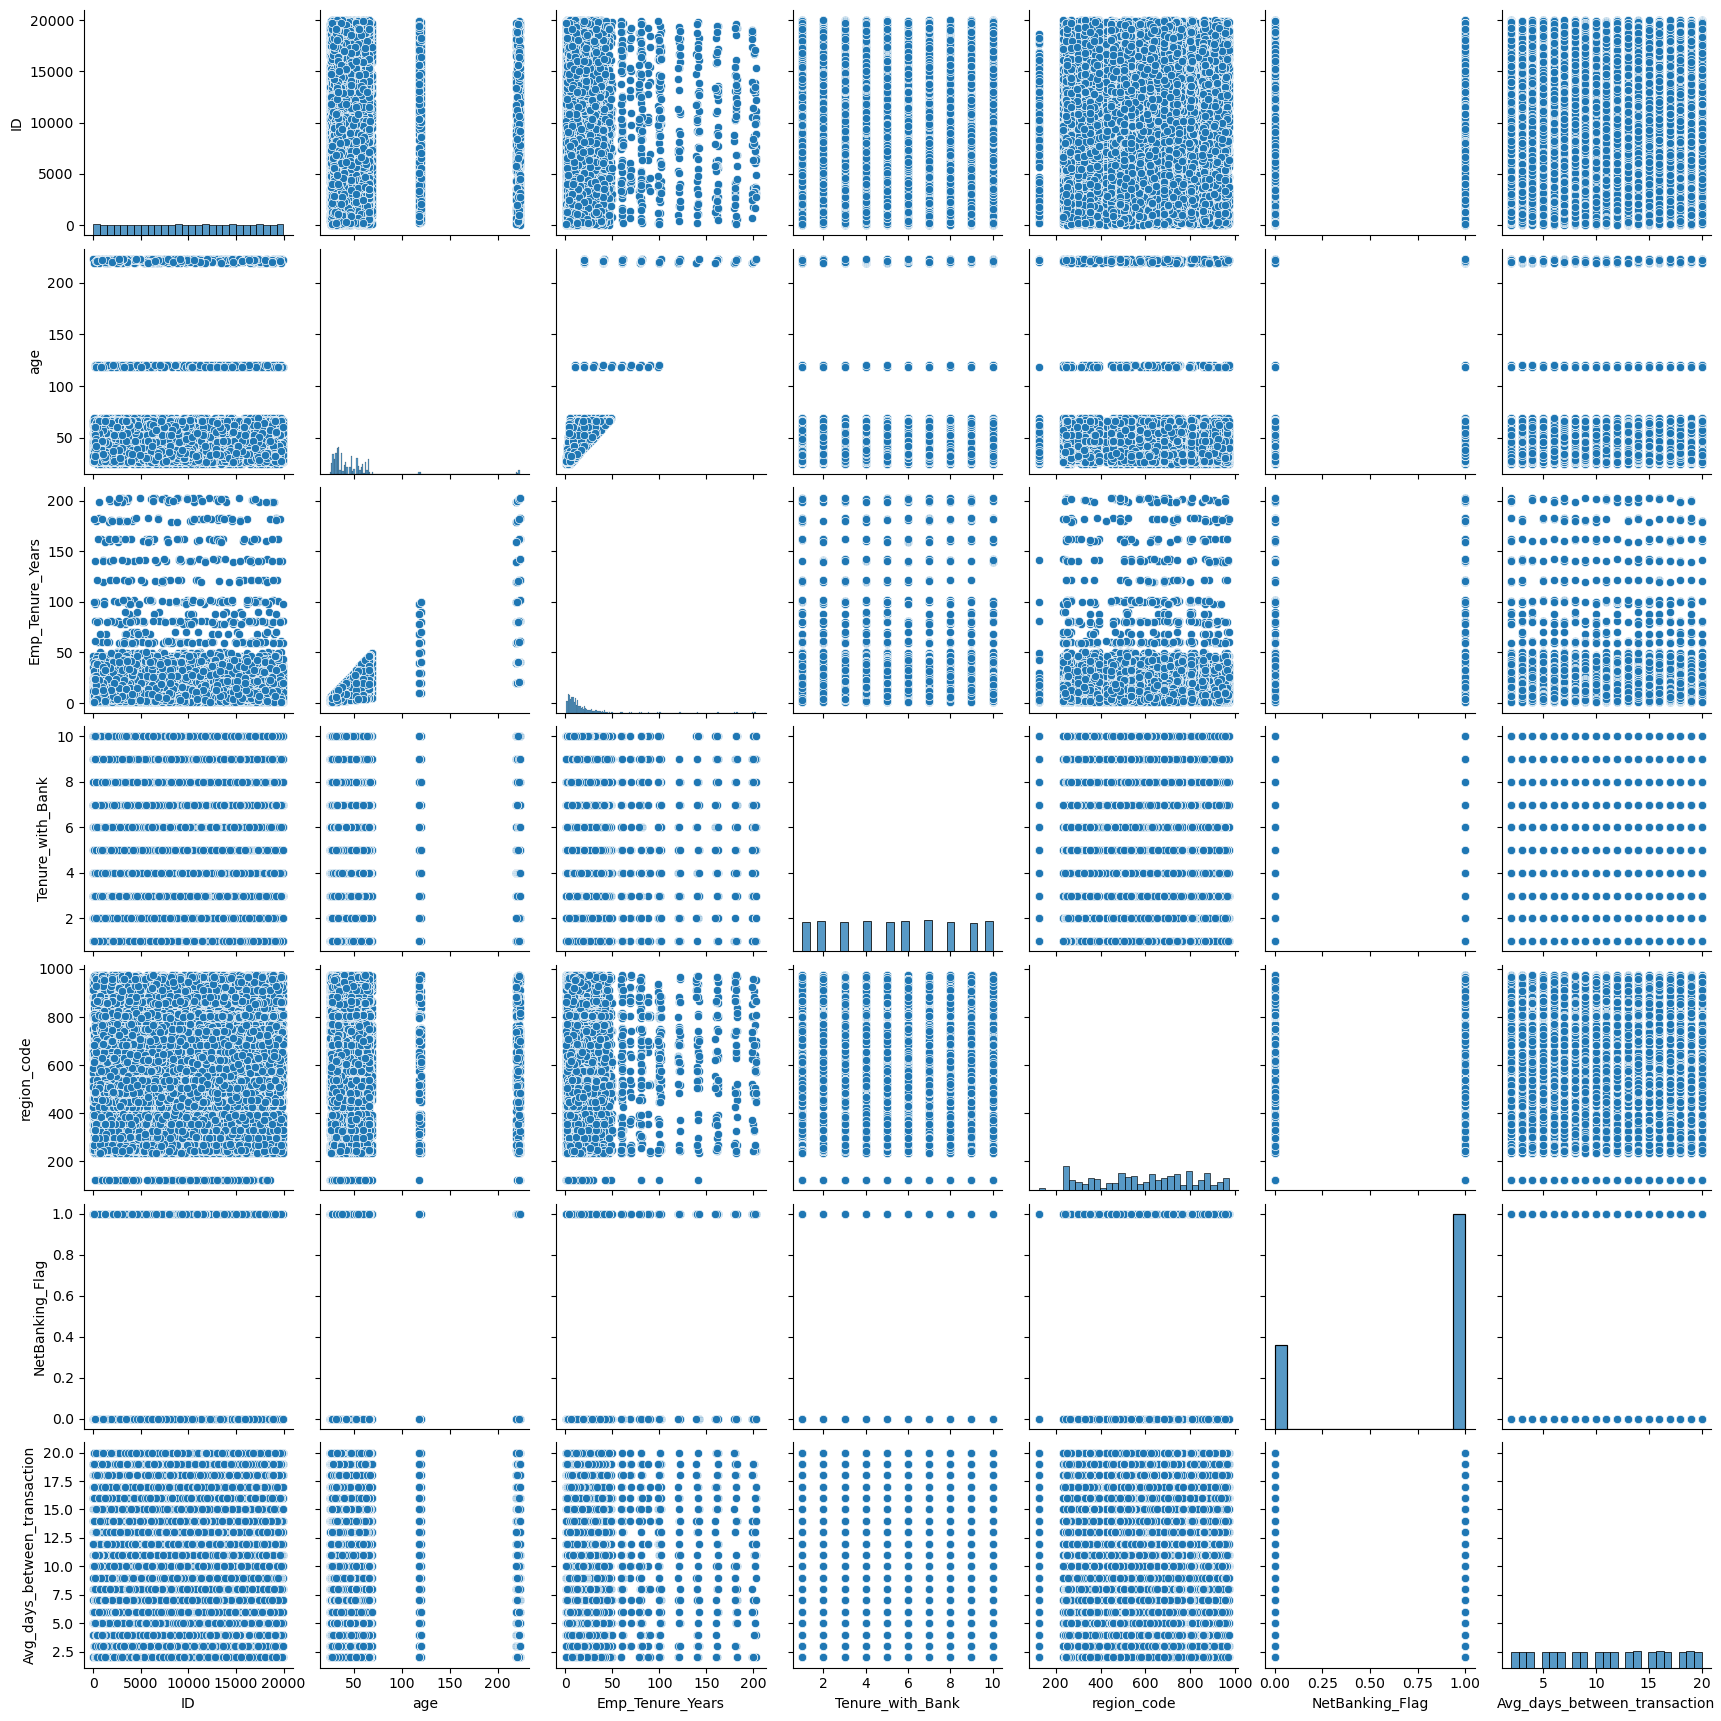

In [12]:
# Pairplot for visualizing relationships in customer demographics
sns.pairplot(cust_demographics)

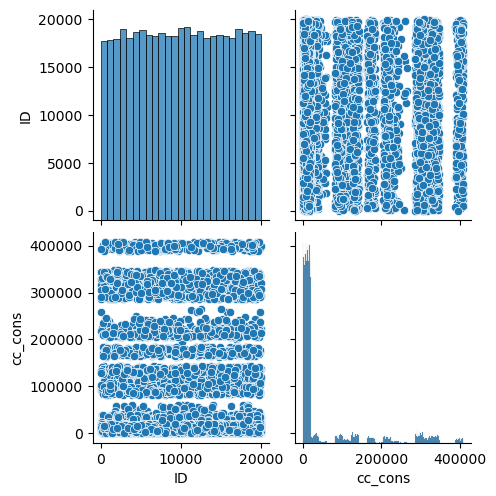

In [13]:
# Pairplot for visualizing relationships in credit consumption data
sns.pairplot(credit_consumption)

In [14]:
# Explore the target variable 'cc_cons'
print("Summary statistics of cc_cons:")
print(credit_consumption['cc_cons'].describe())

Summary statistics of cc_cons:
count     15000.000000
mean      55157.729867
std       97670.972252
min           0.000000
25%        6768.000000
50%       13364.000000
75%       20105.750000
max      408382.000000
Name: cc_cons, dtype: float64


In [15]:
# Merge data on customer ID
df = cust_demographics.merge(cust_behavior, on='ID', how='inner')
df = df.merge(credit_consumption, on='ID', how='inner')

In [16]:
# Drop the 'ID' column
df.drop(['ID'], axis=1, inplace=True)

In [17]:
# Outlier handling using Interquartile Range (IQR)
p0 = df.cc_cons.quantile(0)
p100 = df.cc_cons.quantile(1)
p25 = df.cc_cons.quantile(0.25)
p75 = df.cc_cons.quantile(0.75)

IQR = p75 - p25
lc = p25 - 1.5 * IQR
uc = p75 + 1.5 * IQR

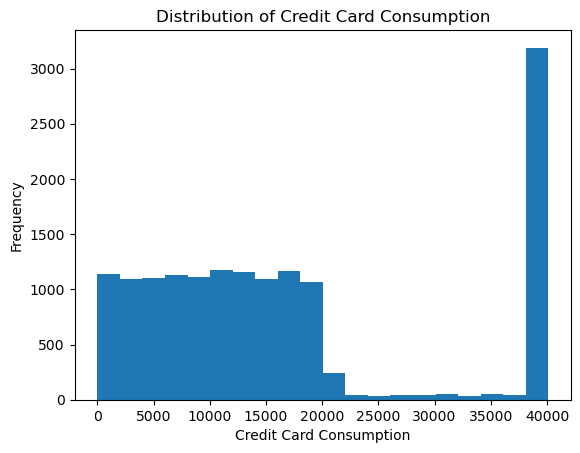

In [19]:
# Visualize the distribution of cc_cons
import matplotlib.pyplot as plt

plt.hist(df['cc_cons'], bins=20)
plt.xlabel('Credit Card Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Card Consumption')
plt.show()

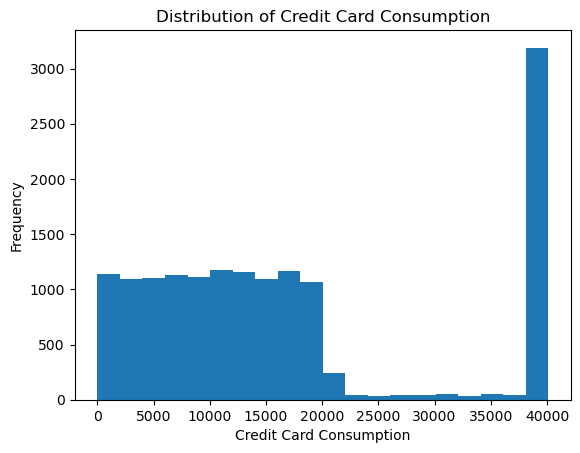

In [20]:
# Visualize the distribution of 'cc_cons'
import matplotlib.pyplot as plt

plt.hist(df['cc_cons'], bins=20)
plt.xlabel('Credit Card Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Card Consumption')
plt.show()

In [21]:
# Data preprocessing for Random Forest model
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['account_type'] = label_encoder.fit_transform(df['account_type'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Income'] = label_encoder.fit_transform(df['Income'])
df['NetBanking_Flag'] = label_encoder.fit_transform(df['NetBanking_Flag'])
df['loan_enq'] = label_encoder.fit_transform(df['loan_enq'])
df['age'] = label_encoder.fit_transform(df['age'])

In [22]:
# Assuming 'Account_type' is the column containing the problematic value
df['account_type'] = pd.to_numeric(df['account_type'], errors='coerce')

In [23]:
# Change data type of 'cc_cons' to float64
df['cc_cons'] = df['cc_cons'].astype('float64')

In [24]:
# Validate the model with train-test split
from sklearn.model_selection import train_test_split

X = df.drop('cc_cons', axis=1)
y = df['cc_cons']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Train a Random Forest regressor
model = RandomForestRegressor(random_state=101)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [26]:
# Make predictions on the validation set
val_predictions = model.predict(X_val)

In [27]:
# Calculate root mean square percentage error (RMSPE)
rmspe = np.sqrt(np.mean(np.square((y_val - val_predictions) / y_val))) * 100
print("RMSPE on validation set:", rmspe)

RMSPE on validation set: 4081.3659653003015


In [28]:
# Perform cross-validation and obtain predicted values using Random Forest regressor
rf_model = RandomForestRegressor()
X = df.drop('cc_cons', axis=1)
y = df['cc_cons']
predicted = cross_val_predict(rf_model, X, y, cv=5)

In [29]:
# Calculate the R-squared score
r2 = r2_score(y, predicted)
print("R-squared:", r2)

R-squared: -0.02506245168980903


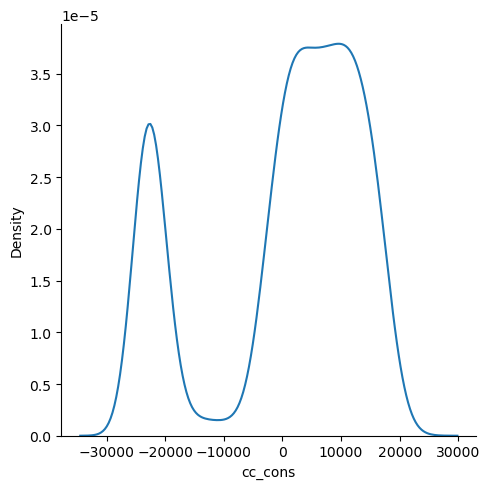

In [30]:
# Visualize predicted values compared to actual values using Seaborn
sns.displot(predicted - y, kind='kde')

In [31]:
# Assuming 'predicted_values.csv' contains the predicted values
predicted_file = pd.read_csv('predicted_values.csv')
predicted_file['Predicted_cc_cons']

0       53544.87
1       42837.78
2       63603.60
3       39886.12
4       45426.99
          ...   
4995    54260.71
4996    66215.97
4997    69948.30
4998    60473.73
4999    52542.05
Name: Predicted_cc_cons, Length: 5000, dtype: float64